# ¿Podemos aproximar la cantidad de baños según la antigüedad y el tamaño en metros cuadrados del inmueble?

Analizamos calidad de los datos

In [1]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/home/gianluca/Documents/Metodos Numericos/github_grupal/metodos-num/tp3/notebooks
Python 3.8.5


In [3]:
#crea una matriz la cual tiene cada feature en sus columnas


def crearPhi(features, data , label):
    vals = []
    for f in features: 
        x = data[f].dropna().values
        x /= np.linalg.norm(x)
        vals.append(x)
    
    
    y = data[label].dropna().values 
    
    sinNan = min(len(y) , min([len(s) for s in vals ]))
    y = y[:sinNan]
    y = y.reshape(len(y),1) 
    
    X = np.zeros((sinNan,len(features)))
    
    for i in range (len(features) ):
        X[:,i] = vals[i][:sinNan]
    
      
    return X, y
    

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error ,mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures


def cross_val(X, y, linear_regressor, k, func = "Poly",grado = 3):
    
    RMSE = []
    RMSLE= []
    
    kf = KFold(n_splits=k,shuffle = False)
    i = 1
    
    if (func == "Poly"):
        poly = PolynomialFeatures(grado)
        X = poly.fit_transform(X)
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        linear_regressor.fit(X_train,y_train)

        y_pred = linear_regressor.predict(X_test)


        rmse= np.sqrt(mean_squared_error(y_test, y_pred))
        rmsle = mean_squared_log_error(y_test, y_pred)

        RMSE.append(rmse)
        RMSLE.append(rmsle)
        i += 1
    

    return RMSE,RMSLE

In [96]:
#cuantos elementos faltan para cada caracteristica?
df = pd.read_csv('../data/train.csv')
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [97]:

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
filtNull = df["antiguedad"].notnull()
df = df[filtNull]

No handles with labels found to put in legend.


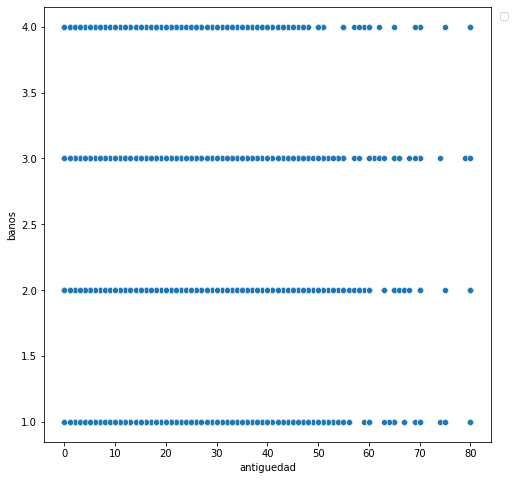

No handles with labels found to put in legend.


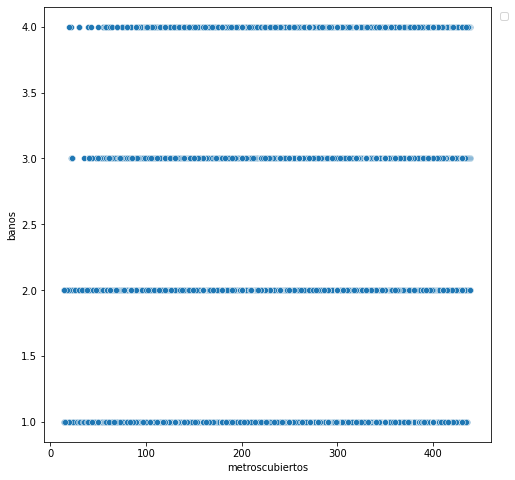

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "metroscubiertos", y = "banos" )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Notamos un indicio de relacion entre metros cubiertos y la cantidad de banios. No sucede lo mismo con antiguedad.

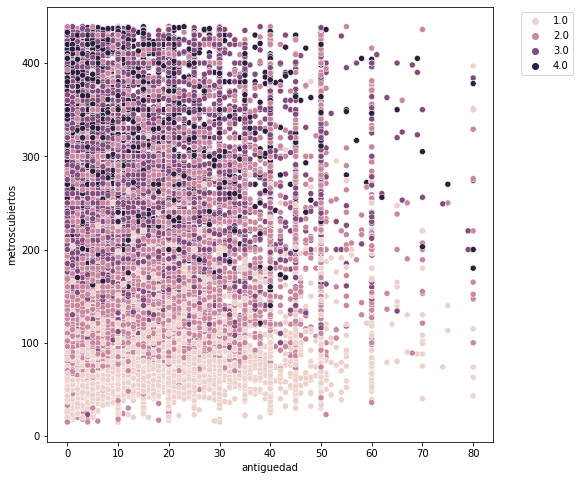

In [11]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174890 entries, 1 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          174890 non-null  int64  
 1   titulo                      170730 non-null  object 
 2   descripcion                 173714 non-null  object 
 3   tipodepropiedad             174884 non-null  object 
 4   direccion                   153912 non-null  object 
 5   ciudad                      174771 non-null  object 
 6   provincia                   174866 non-null  object 
 7   antiguedad                  174890 non-null  float64
 8   habitaciones                171827 non-null  float64
 9   garages                     154461 non-null  float64
 10  banos                       174890 non-null  float64
 11  metroscubiertos             174890 non-null  float64
 12  metrostotales               135997 non-null  float64
 13  idzona        

In [19]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
X.shape

(174890, 2)

In [20]:
gradoPoly = 2
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
X.shape           

(174890, 6)

In [23]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()

gradoPoly = 2
poly = PolynomialFeatures(gradoPoly)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)


rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6172595106476712

Mean Absolute Error :0.48014723178542207



 Accuracy : 0.6136142718280062


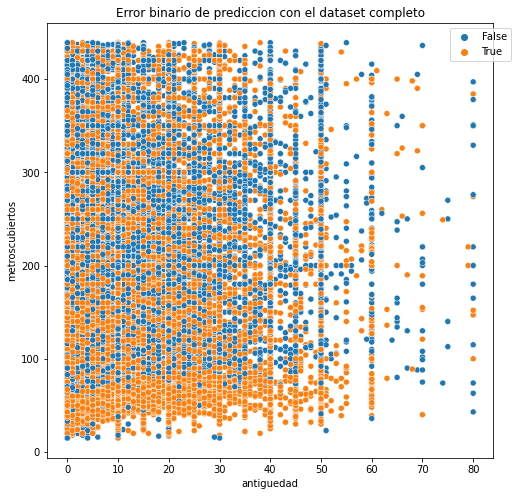

In [24]:
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "antiguedad", y = "metroscubiertos",hue =boolpred )
plt.title("Error binario de prediccion con el dataset completo")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


# Hacemos cross validation sobre el dataset completo

Probamos con polinomios de grado 2 y 3 

In [73]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 2)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")


Root Mean Squared Error :0.6172849755114719

Root Mean Squared Log Error :0.038893292967356954



In [74]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6158778695211771

Root Mean Squared Log Error :0.038729169377751935



# Segmentamos por tipo de propiedad

In [80]:
df["tipodepropiedad"].unique()

array(['Casa en condominio', 'Casa', 'Apartamento', 'Quinta Vacacional',
       'Local Comercial', 'Casa uso de suelo',
       'Local en centro comercial', 'Oficina comercial',
       'Bodega comercial', 'Villa', 'Duplex', 'Terreno',
       'Terreno comercial', 'Departamento Compartido', 'Nave industrial',
       'Rancho', 'Edificio', nan, 'Inmuebles productivos urbanos',
       'Otros', 'Huerta', 'Terreno industrial'], dtype=object)

In [87]:
Domicilio = ['Casa en condominio', 'Casa', 'Apartamento', 'Quinta Vacacional',
        'Casa uso de suelo',
        'Villa', 'Duplex',
        'Departamento Compartido','Rancho', 'Edificio']

In [98]:
df = df[df.tipodepropiedad.isin(Domicilio)]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172139 entries, 1 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          172139 non-null  int64  
 1   titulo                      168034 non-null  object 
 2   descripcion                 170984 non-null  object 
 3   tipodepropiedad             172139 non-null  object 
 4   direccion                   151671 non-null  object 
 5   ciudad                      172026 non-null  object 
 6   provincia                   172116 non-null  object 
 7   antiguedad                  172139 non-null  float64
 8   habitaciones                171084 non-null  float64
 9   garages                     152527 non-null  float64
 10  banos                       172139 non-null  float64
 11  metroscubiertos             172139 non-null  float64
 12  metrostotales               134195 non-null  float64
 13  idzona        

In [100]:
X, y_true = crearPhi(['metroscubiertos','antiguedad'],df,"banos")
linear_regressor = metnum.LinearRegression()
k = 5
cvR,cvL = cross_val(X, y_true, linear_regressor, k,grado = 3)
meanRMSE = np.mean(np.array(cvR))
meanRMSLE = np.mean(np.array(cvL))

print(f"Root Mean Squared Error :{meanRMSE}\n")
print(f"Root Mean Squared Log Error :{meanRMSLE}\n")

Root Mean Squared Error :0.6087741373963863

Root Mean Squared Log Error :0.037729841437458216



# Utilizamos antigüedad y metroscubiertos para predecir #banos segmentando por Provincia de Yucatan

In [79]:
df["usosmultiples"].unique()

array([0., 1.])

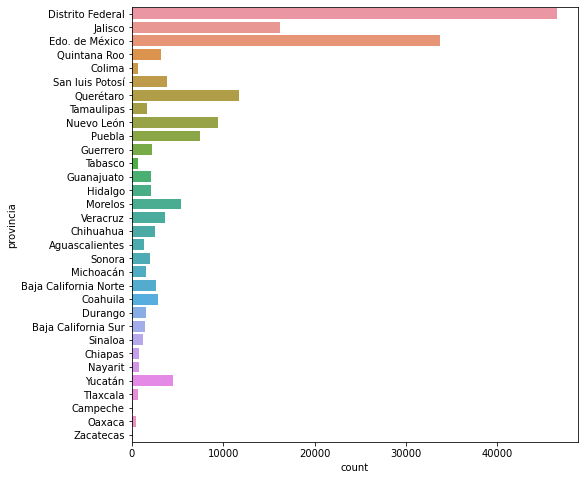

In [78]:
plt.figure(figsize=(8,8))

sns.countplot( data = df  ,y =  "provincia")

plt.show()

In [3]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]


In [4]:
df = df[df['provincia'] == 'Yucatán']

In [21]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.6348258235434426

Mean Absolute Error :0.5088306948917826



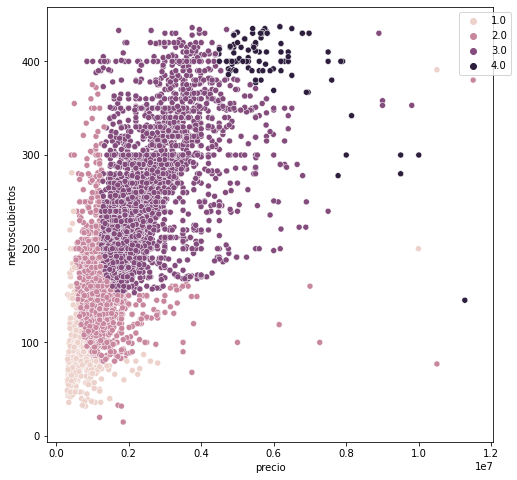

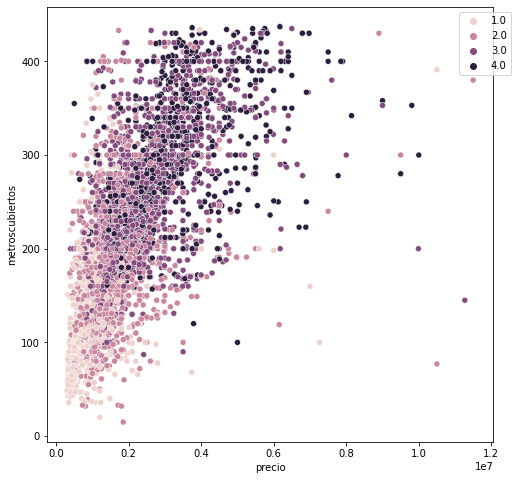

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

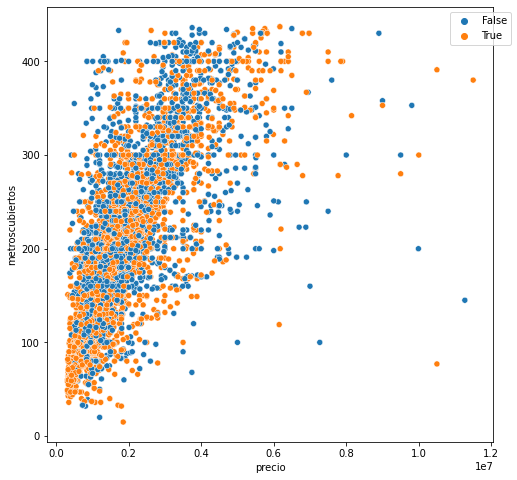

In [18]:
boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

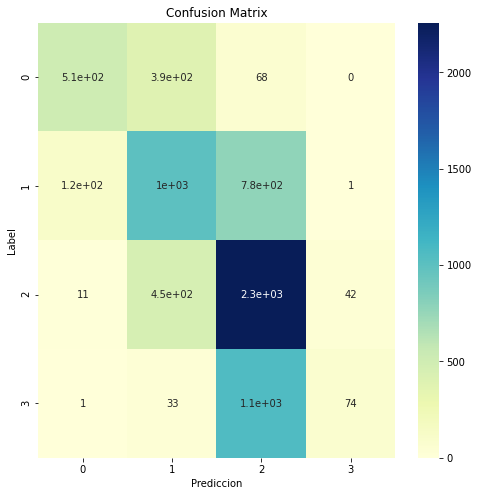

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true.reshape(-1),np.around(y_pred).reshape(-1))
plt.figure(figsize=(8,8))
sns.heatmap(cm,cmap = "YlGnBu",annot = True)
plt.title("Confusion Matrix")

plt.xlabel("Prediccion")
plt.ylabel("Label")
plt.show()

# Segmentamos todavia mas chau cuatro banios con menos estas bien

In [23]:
df = df[df['banos'] < 4.]

In [24]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5203122886169889

Mean Absolute Error :0.4179789330730125



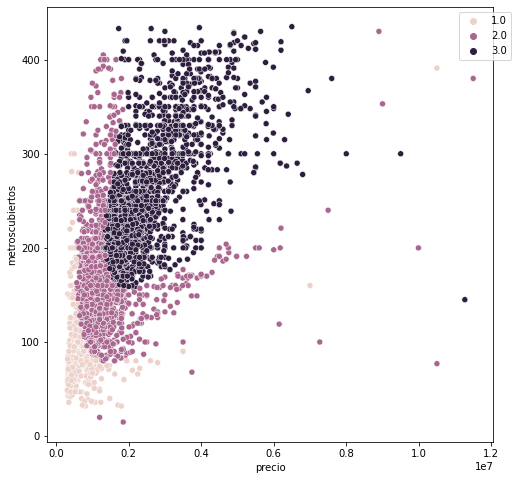

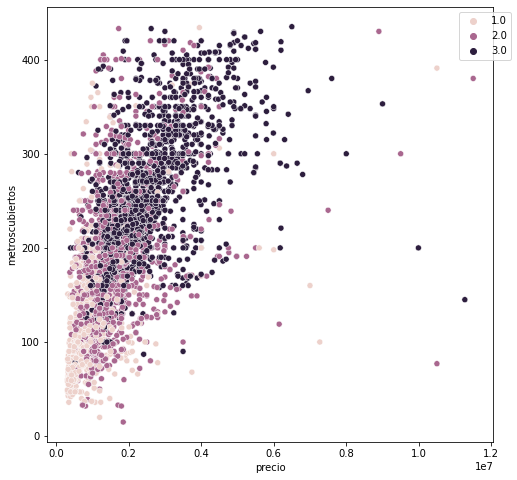

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.6695683069817019


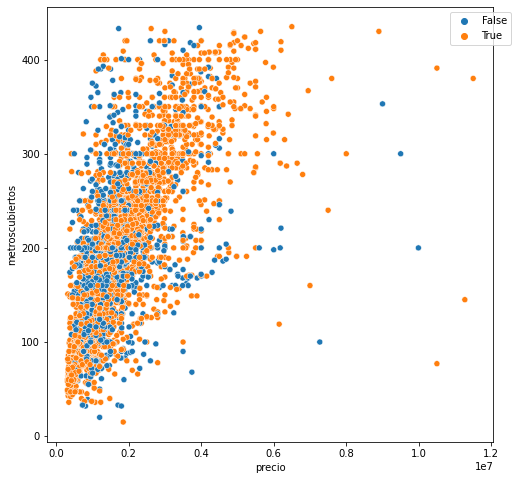

In [34]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos todavia mas chau tres banios con menos estas bien

In [36]:
df = df[df['banos'] < 3.]

In [37]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.3697142531091898

Mean Absolute Error :0.2774592457045498



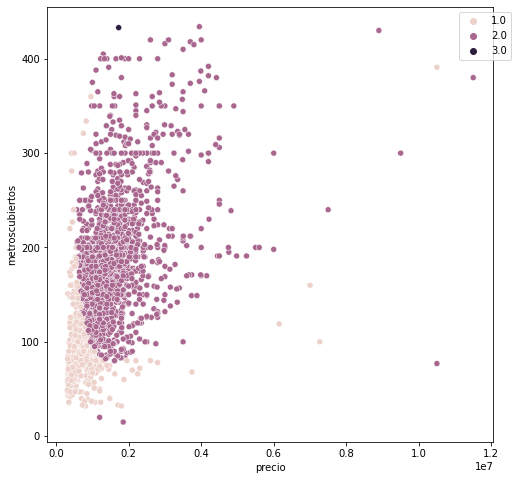

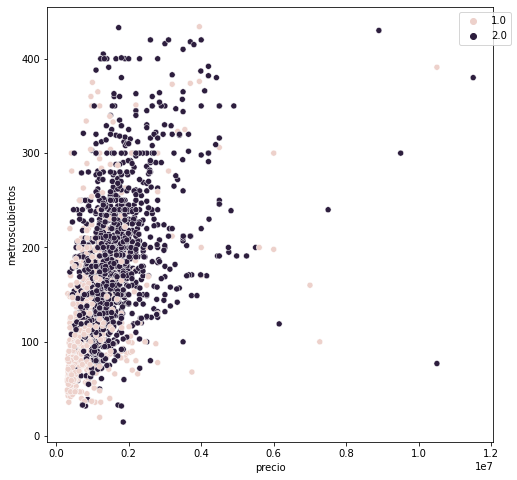

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =np.around(y_pred).reshape(-1) )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

 Accuracy : 0.8013245033112583


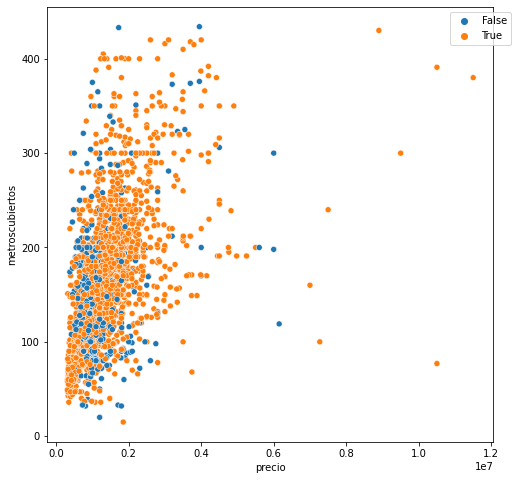

In [40]:
from sklearn.metrics import accuracy_score

boolpred = y_true.reshape(-1) == np.around(y_pred).reshape(-1)
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue =boolpred )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Segmentamos por ciudades de Yucatan

In [42]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']

In [46]:
len(df["ciudad"].unique())

35

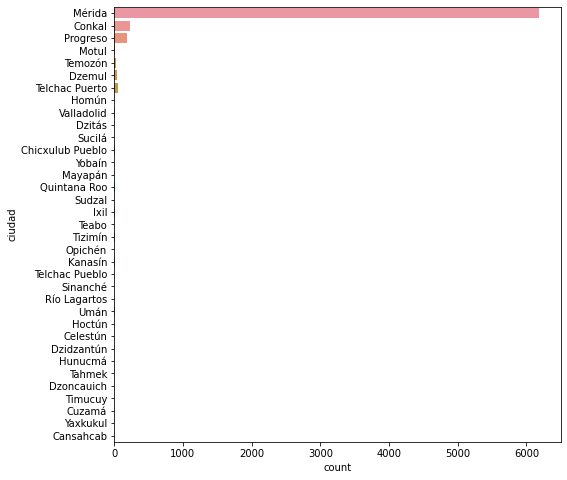

In [49]:
plt.figure(figsize=(8,8))
chart = sns.countplot(data = df, y = "ciudad")
#chart.set_xticklabels(chart.get_yticklabels(), rotation=90, horizontalalignment='right')

plt.show()

# Elegimos merida por ser la que mas inmuebles tiene en el dataset

In [50]:
df = df[df['ciudad'] == 'Mérida']

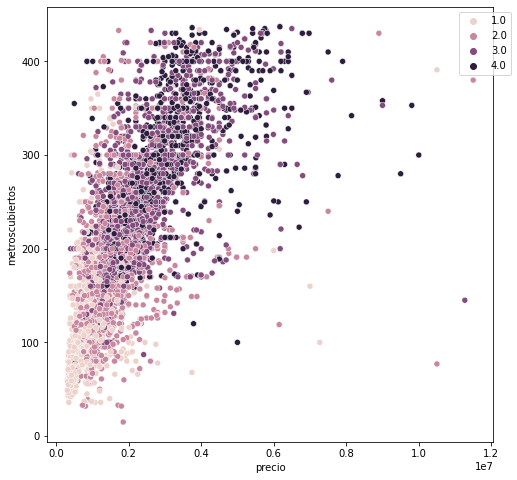

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

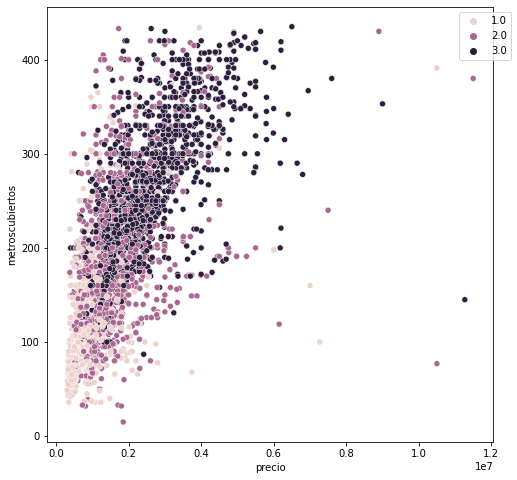

In [53]:
df = df[df['banos'] < 4]

plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [54]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5138074531171324

Mean Absolute Error :0.41039784592406453



# No le habia sumado metrostotales vamos con esa REYY(Yucatan)

In [56]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metrostotales"].notnull()
df = df[filtNull]
filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]

# No parece haber ningun cambio

In [57]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")

Polynomial Function
Root Mean Square Error :0.5210474221730538

Mean Absolute Error :0.4183337687971789



# Servira segmentar por inmueble?

In [63]:

df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]

df = df[df['provincia'] == 'Yucatán']


#df = df[df["tipodepropiedad"] == "Apartamento"]

Text(0.5, 0, 'tipodepropiedad')

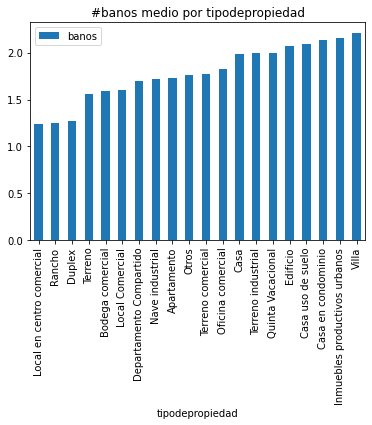

In [58]:

df_provinces = df.groupby(['tipodepropiedad']).mean().sort_values(by = 'banos')
ax = df_provinces.plot.bar(y = 'banos')
ax.set_title('#banos medio por tipodepropiedad')
ax.set_xlabel('tipodepropiedad')

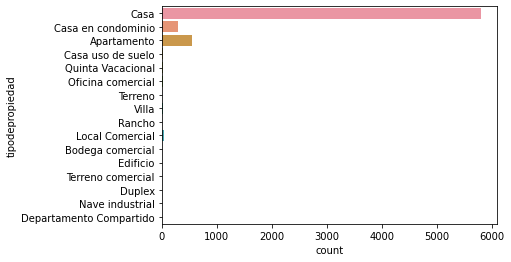

<AxesSubplot:xlabel='count', ylabel='tipodepropiedad'>

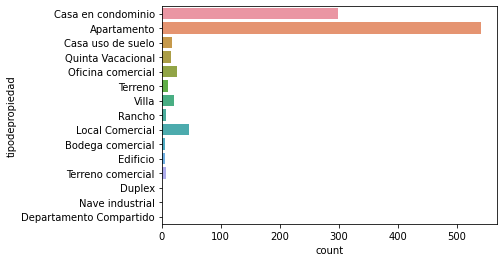

In [84]:
sns.countplot(data = df , y = "tipodepropiedad")
plt.show()
sns.countplot(data = df[df["tipodepropiedad"] != "Casa"] , y = "tipodepropiedad")

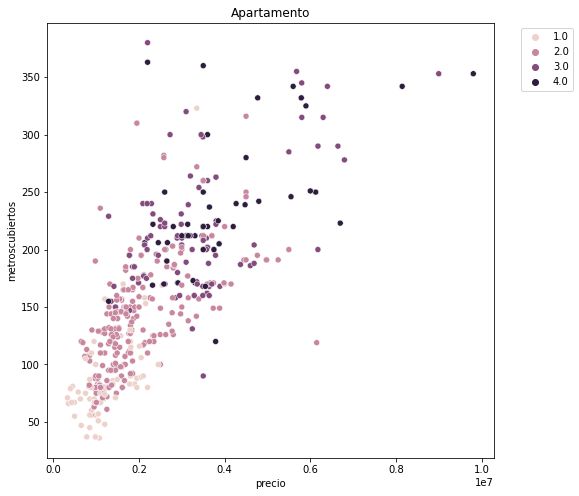

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Apartamento"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Apartamento")
plt.show()

In [64]:
df["banos"].unique()

array([4., 1., 3., 2.])

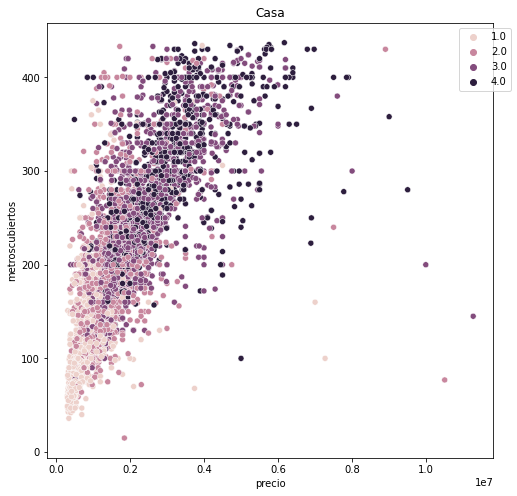

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df[df["tipodepropiedad"] == "Casa"], x = "precio", y = "metroscubiertos",hue ='banos' )
plt.legend(bbox_to_anchor=(1.05, 1))

plt.title("Casa")
plt.show()

<AxesSubplot:xlabel='banos', ylabel='tipodepropiedad'>

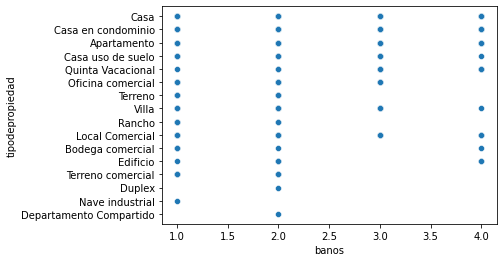

In [86]:
sns.scatterplot(data = df, y = "tipodepropiedad", x = "banos")

# Nos concentramos en Yucatan con 3 banos que fue lo que mejor funciono pero agregamos algunos features que dieron bien correlacionados para ver si mejora

In [92]:
df = pd.read_csv('../data/train.csv')

filtNull = df["metroscubiertos"].notnull()
df = df[filtNull]
filtNull = df["banos"].notnull()
df = df[filtNull]
df = df[df['banos'] < 4.]
df = df[df['provincia'] == 'Yucatán']

In [94]:
#utilizamos phi polynomial de grado 2

X, y_true = crearPhi(['metroscubiertos','precio','metrostotales','habitaciones','garages'],df,"banos")
linear_regressor = metnum.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(X,y_true)
y_pred = linear_regressor.predict(X)

from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse= np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("Polynomial Function")
print(f"Root Mean Square Error :{rmse}\n")
print(f"Mean Absolute Error :{mae}\n")
print(f" Accuracy : {accuracy_score(y_true.reshape(-1), np.around(y_pred).reshape(-1))}" )


Polynomial Function
Root Mean Square Error :0.4877367680016403

Mean Absolute Error :0.384992385055786

 Accuracy : 0.7060240963855422
